In [1]:
import pandas as pd
import matplotlib as plt
import re
import jieba
from tqdm import tqdm
fb = pd.read_csv('nysu_10902_2019_research_right.csv')
politics = pd.read_csv('9th_legislator_promise.csv')

In [2]:
fb.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,244784245612709_2052039854887130,244784245612709,陳學聖,政治人物,鑒於中油觀塘案在環評大會迅速通關，原先專案小組考量對藻礁生態有重大影響，建議退回目的事業主管...,NaN,photo,https://www.facebook.com/244784245612709/posts...,2019-01-15T11:00:16+0000,2019-01-15T19:00:16,...,NaN,NaN,144,0,0,0,0,0,6,5


In [3]:
lo=fb[fb.page_name=="羅致政粉絲團"]
lo.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
23477,182836328407031_2219870311370279,182836328407031,羅致政粉絲團,政治人物,違法兼職，事證明確，卡不卡管，台大自斷,NaN,link,https://www.facebook.com/182836328407031/posts...,2019-01-15T06:40:53+0000,2019-01-15T14:40:53,...,管中閔違法兼職 監察院7：4通過彈劾 | 蘋果日報,台大校長管中閔已在上周上任，不過，對於他過去擔任學校主管及政府部門任職時在外兼職違法事宜，監...,1029,0,0,0,0,0,42,29


In [4]:
#爬到的最後一篇
lo[lo.created_time_taipei == max(lo.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
24299,182836328407031_1395956743909587,182836328407031,羅致政粉絲團,政治人物,【直播】新北選前之夜\r\n\r\n賴清德 副總統候選人、 蘇貞昌 院長都會到場。邀請大家來...,羅致政粉絲團的直播影片。,video,https://www.facebook.com/voteforlo/videos/1395...,2020-01-10T10:15:01+0000,2020-01-10T18:15:01,...,【直播】新北選前之夜,NaN,472,0,0,0,0,0,21,9


In [5]:
#爬到的第一篇
lo[lo.created_time_taipei == min(lo.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
23494,182836328407031_2200814896609154,182836328407031,羅致政粉絲團,政治人物,反省是再出發的第一步\r\n1月6日民進黨主席補選\r\n懇請黨員全力支持 ①號卓榮泰,NaN,video,https://www.facebook.com/182836328407031/posts...,2019-01-02T02:57:59+0000,2019-01-02T10:57:59,...,NaN,NaN,152,0,0,0,0,0,12,2


In [6]:
#讓我們來做個時間排序吧
lo['new_date'] = pd.to_datetime(lo['created_time_taipei']).dt.date
lo['month_year'] = pd.to_datetime(lo['new_date']).dt.to_period('M')
lo['post_hour']=pd.to_datetime(lo['created_time_taipei']).dt.hour
lo.head(1)

<ipython-input-6-793464da8639>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo['new_date'] = pd.to_datetime(lo['created_time_taipei']).dt.date
<ipython-input-6-793464da8639>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo['month_year'] = pd.to_datetime(lo['new_date']).dt.to_period('M')
<ipython-input-6-793464da8639>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year,post_hour
23477,182836328407031_2219870311370279,182836328407031,羅致政粉絲團,政治人物,違法兼職，事證明確，卡不卡管，台大自斷,NaN,link,https://www.facebook.com/182836328407031/posts...,2019-01-15T06:40:53+0000,2019-01-15T14:40:53,...,0,0,0,0,0,42,29,2019-01-15,2019-01,14


In [7]:
#整個月份的總量
results = lo.groupby('month_year').sum()
results

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
month_year,,,,,,,,,,
2019-01,6764944151060147,9508,0,0,0,0,0,726,343,481
2019-02,5485089852210930,7658,0,0,0,0,0,784,237,390
2019-03,6582107822653116,13476,0,0,0,0,0,1762,503,495
2019-04,11335852361235932,19712,0,0,0,0,0,2489,1030,919
2019-05,16089596899818764,29032,0,0,0,0,0,3203,1187,1318
2019-06,18466469169110180,41782,0,0,0,0,0,3142,977,1574
2019-07,19929159796366436,82948,0,0,0,0,0,4327,2638,1543
2019-08,15723924243004700,94631,0,0,0,0,0,5463,1961,1272
2019-09,8410471106723426,51658,0,0,0,0,0,3114,650,700


In [8]:
results.index.name = 'newhead'
results.reset_index(inplace=True)
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,6764944151060147,9508,0,0,0,0,0,726,343,481
1,2019-02,5485089852210930,7658,0,0,0,0,0,784,237,390
2,2019-03,6582107822653116,13476,0,0,0,0,0,1762,503,495
3,2019-04,11335852361235932,19712,0,0,0,0,0,2489,1030,919
4,2019-05,16089596899818764,29032,0,0,0,0,0,3203,1187,1318
5,2019-06,18466469169110180,41782,0,0,0,0,0,3142,977,1574
6,2019-07,19929159796366436,82948,0,0,0,0,0,4327,2638,1543
7,2019-08,15723924243004700,94631,0,0,0,0,0,5463,1961,1272
8,2019-09,8410471106723426,51658,0,0,0,0,0,3114,650,700
9,2019-10,8776143763537488,63617,0,0,0,0,0,2538,1091,729


In [9]:
results['newhead'].map(str)

0     2019-01
1     2019-02
2     2019-03
3     2019-04
4     2019-05
5     2019-06
6     2019-07
7     2019-08
8     2019-09
9     2019-10
10    2019-11
11    2019-12
12    2020-01
Name: newhead, dtype: object

In [10]:
#發文時間分佈
post_time = lo[['post_id','post_hour']].groupby('post_hour').count()
post_time.index.name = 'post_hour'
post_time.reset_index(inplace = True)
post_time

,post_hour,post_id
0,0,3
1,3,1
2,4,2
3,5,1
4,6,3
5,7,18
6,8,48
7,9,48
8,10,64
9,11,60


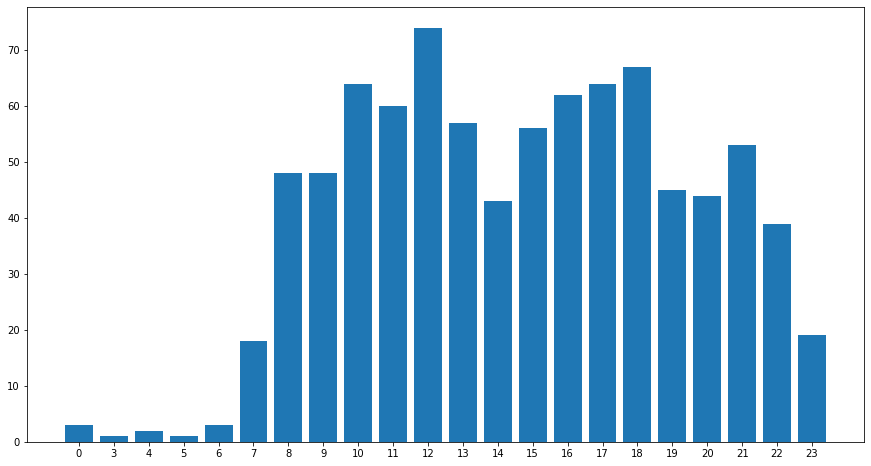

In [11]:
# 以圖表呈現時間分佈
import matplotlib.pyplot as plt

labels = post_time['post_hour'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, post_time['post_id'])

plt.show()

In [12]:
#整年貼文數量分佈
whole_year = lo[['post_id','month_year']].groupby('month_year').count()
whole_year.index.name = 'month_year'
whole_year.reset_index(inplace=True)
whole_year

,month_year,post_id
0,2019-01,37
1,2019-02,30
2,2019-03,36
3,2019-04,62
4,2019-05,88
5,2019-06,101
6,2019-07,109
7,2019-08,86
8,2019-09,46
9,2019-10,48


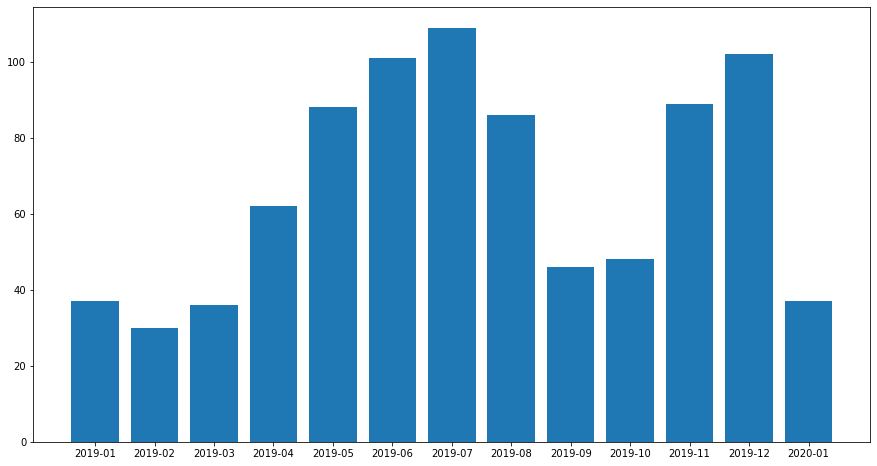

In [13]:
#畫出整年貼文分佈
labels = results['newhead'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.bar(labels, whole_year['post_id'])

plt.show()

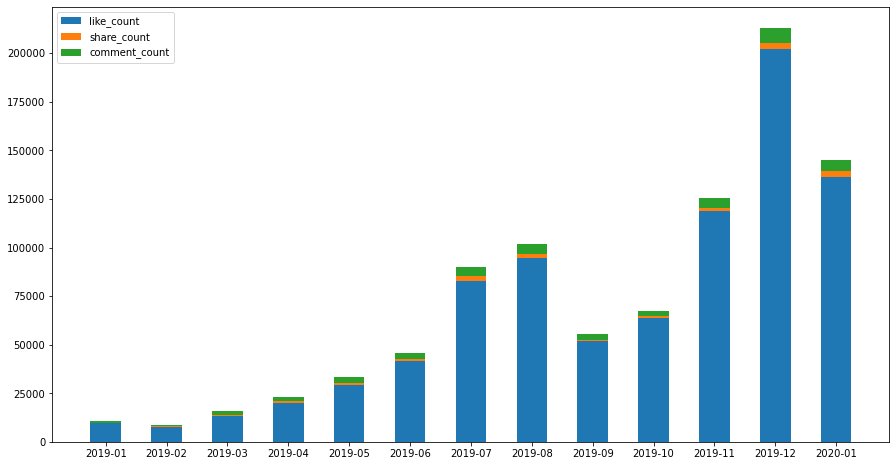

In [14]:
#按讚、分享、留言分佈
import matplotlib.pyplot as plt

labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])

ax.legend()

plt.show()

No handles with labels found to put in legend.


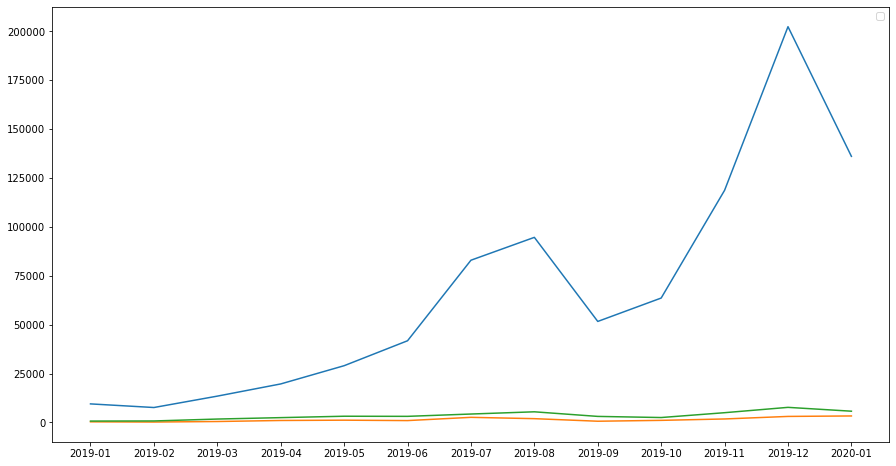

In [15]:
#個別攤開以折線檢視
labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results['like_count'])
ax.plot(labels, results['share_count'])
ax.plot(labels, results['comment_count'])

ax.legend()

plt.show()

## 第十屆立委選舉日，民國109年（2020年）1月11號舉行，其中2019年12月較高的篇數分別是什麼？

In [16]:
December = lo[lo.month_year == "2019-12"]

In [17]:
results_december  = December.groupby('new_date').sum()
results_december

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
new_date,,,,,,,,,,
2019-12-01,914181642035155,7398,0,0,0,0,0,315,129,67
2019-12-02,731345313628124,3325,0,0,0,0,0,118,51,63
2019-12-03,548508985221093,4717,0,0,0,0,0,146,56,44
2019-12-04,548508985221093,4685,0,0,0,0,0,157,97,49
2019-12-05,548508985221093,1823,0,0,0,0,0,64,38,48
2019-12-06,548508985221093,4449,0,0,0,0,0,132,61,52
2019-12-07,731345313628124,8863,0,0,0,0,0,263,103,68
2019-12-08,548508985221093,4316,0,0,0,0,0,259,83,62
2019-12-09,731345313628124,8826,0,0,0,0,0,372,176,56


No handles with labels found to put in legend.


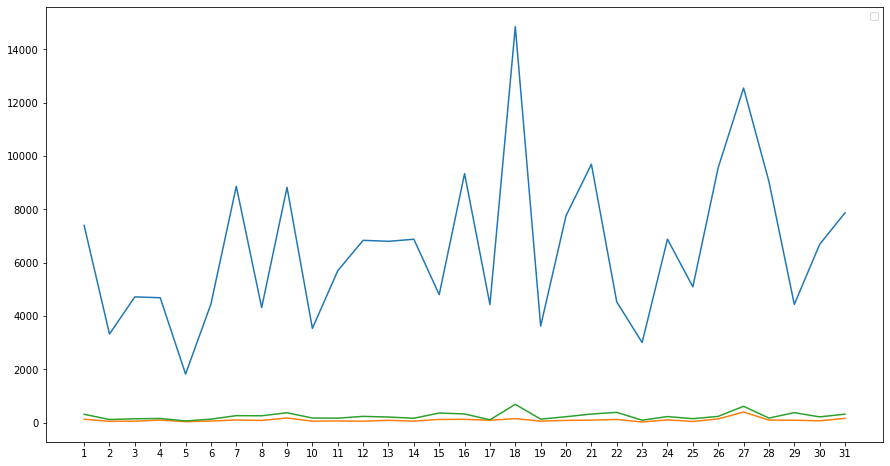

In [18]:
#畫圖 看整個月按讚、分享、評論的流量
labels = [str(i) for i in range(1,32)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_december['like_count'])
ax.plot(labels, results_december['share_count'])
ax.plot(labels, results_december['comment_count'])

ax.legend()

plt.show()

## 從上述的途中我們可以看得出來，最高的篇數分別落在18號與27號，內容個分別為甚麼？

In [19]:
lo['new_date']=lo['new_date'].map(str)
lo[lo['new_date'] == "2019-12-18"]

<ipython-input-19-bf1bc776d6ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo['new_date']=lo['new_date'].map(str)


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year,post_hour
24274,182836328407031_2834766799880624,182836328407031,羅致政粉絲團,政治人物,馬拉松式的車隊掃街，\r\n感謝有你們沿路相挺！\r\n\r\n剛回到總部，真是充實的一天！...,羅致政粉絲團──在總統蔡英文、立委羅致政連任競選總部。,photo,https://www.facebook.com/182836328407031/posts...,2019-12-18T15:12:08+0000,2019-12-18T23:12:08,...,0,0,0,0,0,111,47,2019-12-18,2019-12,23
24275,182836328407031_455885062005986,182836328407031,羅致政粉絲團,政治人物,【政在直播】車隊出發！\r\n\r\n⑦號羅致政，旗開得勝！,羅致政粉絲團的直播影片。,video,https://www.facebook.com/voteforlo/videos/4558...,2019-12-18T02:28:12+0000,2019-12-18T10:28:12,...,0,0,0,0,0,246,33,2019-12-18,2019-12,10
24276,182836328407031_2833674199989884,182836328407031,羅致政粉絲團,政治人物,就在剛剛，致政抽中幸運數字7號\r\n\r\n⑦ 號羅致政，旗開得勝！\r\n\r\n#新北...,羅致政粉絲團──在新北選委會。,photo,https://www.facebook.com/182836328407031/posts...,2019-12-18T02:29:32+0000,2019-12-18T10:29:32,...,0,0,0,0,0,298,57,2019-12-18,2019-12,10
24277,182836328407031_2833378816686089,182836328407031,羅致政粉絲團,政治人物,【直播預告】號次一決定，車隊大遊行！\r\n\r\n今天上午，致政將到選委會抽出號次，緊接著...,NaN,photo,https://www.facebook.com/182836328407031/posts...,2019-12-17T23:02:20+0000,2019-12-18T07:02:20,...,0,0,0,0,0,32,14,2019-12-18,2019-12,7


In [20]:
lo['new_date']=lo['new_date'].map(str)
lo[lo['new_date'] == "2019-12-27"]

<ipython-input-20-f6577f7038d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo['new_date']=lo['new_date'].map(str)


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year,post_hour
24346,182836328407031_2853890234634947,182836328407031,羅致政粉絲團,政治人物,真情相挺！\r\n\r\n謝謝我的好友丁學偉，在他兒子生日當天，特別趕來站台，幽默又中肯的助...,NaN,video,https://www.facebook.com/182836328407031/posts...,2019-12-27T08:01:35+0000,2019-12-27T16:01:35,...,0,0,0,0,0,563,370,2019-12-27,2019-12,16
24347,182836328407031_2853564484667522,182836328407031,羅致政粉絲團,政治人物,正義金剛何博文粉絲團議員前來助陣！\r\n\r\n今早，我們在埔墘興隆市場向大家問好，鄉親們...,羅致政粉絲團──在埔墘興隆市場。,photo,https://www.facebook.com/182836328407031/posts...,2019-12-27T03:48:13+0000,2019-12-27T11:48:13,...,0,0,0,0,0,52,30,2019-12-27,2019-12,11


### 2019年12月18日羅致政抽中為參選人編號 **7號**
https://www.facebook.com/voteforlo/posts/2833674199989884
### 2019年12月18日舉行馬拉松式掃街
https://www.facebook.com/voteforlo/posts/2834766799880624?comment_id=2836005023090135
### 2019年12月27日為媒體人 **丁學偉** 為羅致政站台
https://www.facebook.com/182836328407031/videos/1248764275314682

## 另外，我們也看出7月與8月的關注比往常高一些，原因是什麼？

In [21]:
results_jul = lo[lo.month_year == "2019-07"].groupby('new_date').sum()
results_jul[results_jul.like_count == max(results_jul.like_count)]

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
new_date,,,,,,,,,,
2019-07-14,1097017970442186,13647,0,0,0,0,0,605,363,71


In [22]:
lo['new_date']=lo['new_date'].map(str)
lo[lo['new_date'] == "2019-07-14"]

<ipython-input-22-a4696b352d19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo['new_date']=lo['new_date'].map(str)


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year,post_hour
23827,182836328407031_2514079395282701,182836328407031,羅致政粉絲團,政治人物,要有創意，國旗不是只能繡在帽子上。 🇹🇼 🇰🇳\r\n\r\n這次出訪，巧思無所不在。不論是...,羅致政粉絲團──在聖克里斯多福與尼維斯。,photo,https://www.facebook.com/182836328407031/posts...,2019-07-14T15:34:29+0000,2019-07-14T23:34:29,...,0,0,0,0,0,37,45,2019-07-14,2019-07,23
23828,182836328407031_2513315705359070,182836328407031,羅致政粉絲團,政治人物,「親愛的蔡總統，謝謝妳保護台灣，還有我在彰化和三峽的阿嬤和阿公，妳是我的超級英雄。」\r\n...,羅致政粉絲團──在 Central Park 。,photo,https://www.facebook.com/182836328407031/posts...,2019-07-14T12:30:57+0000,2019-07-14T20:30:57,...,0,0,0,0,0,70,113,2019-07-14,2019-07,20
23829,182836328407031_2513196665370974,182836328407031,羅致政粉絲團,政治人物,#自由民主永續之旅\r\n#一天三國拼外交\r\n#加勒比海\r\n\r\n一天停留三個不同...,NaN,photo,https://www.facebook.com/182836328407031/posts...,2019-07-14T04:59:34+0000,2019-07-14T12:59:34,...,0,0,0,0,0,56,13,2019-07-14,2019-07,12
23830,182836328407031_2513004908723483,182836328407031,羅致政粉絲團,政治人物,早安！在中央公園健走後、離開紐約前，我們登船遊覽哈德遜河，近距離欣賞自由女神像。\r\n\r...,羅致政粉絲團──在 Hudson River Park 。,video,https://www.facebook.com/182836328407031/posts...,2019-07-14T02:24:12+0000,2019-07-14T10:24:12,...,0,0,0,0,0,394,124,2019-07-14,2019-07,10
23831,182836328407031_2512682838755690,182836328407031,羅致政粉絲團,政治人物,#自由民主永續之旅\r\n#台灣精品行銷世界\r\n#一天三國拼外交\r\n\r\n經過近四...,NaN,photo,https://www.facebook.com/182836328407031/posts...,2019-07-13T22:14:05+0000,2019-07-14T06:14:05,...,0,0,0,0,0,25,10,2019-07-14,2019-07,6
23832,182836328407031_2512189312138376,182836328407031,羅致政粉絲團,政治人物,#自由民主永續之旅\r\n#中央公園\r\n#大蘋果\r\n\r\n紐約行程的最後一天，蔡英...,羅致政粉絲團──在 Central Park 。,photo,https://www.facebook.com/182836328407031/posts...,2019-07-13T16:04:21+0000,2019-07-14T00:04:21,...,0,0,0,0,0,23,58,2019-07-14,2019-07,0


### 2019年07年14羅致政 **參與外交任務，與蔡英文總統、市長鄭文燦、立委管碧玲共遊哈德遜河**
https://www.facebook.com/voteforlo/posts/2513004908723483

In [23]:
results_aug = lo[lo.month_year == "2019-08"].groupby('new_date').sum()
results_aug[results_aug.like_count == max(results_aug.like_count)]

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
new_date,,,,,,,,,,
2019-08-11,731345313628124,9298,0,0,0,0,0,825,213,63


In [24]:
lo['new_date']=lo['new_date'].map(str)
lo[lo['new_date'] == "2019-08-11"]

<ipython-input-24-90103f8e28ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo['new_date']=lo['new_date'].map(str)


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year,post_hour
23941,182836328407031_2563198897037417,182836328407031,羅致政粉絲團,政治人物,接雲寺與慈惠宮是板橋人的信仰中心，今天陪同蔡英文 Tsai Ing-wen總統來參香，看到許...,羅致政粉絲團新增了 9 張相片。,photo,https://www.facebook.com/182836328407031/posts...,2019-08-11T13:08:38+0000,2019-08-11T21:08:38,...,0,0,0,0,0,31,13,2019-08-11,2019-08,21
23942,182836328407031_481967819265979,182836328407031,羅致政粉絲團,政治人物,【政在直播】蔡英文總統板橋慈惠宮參香,羅致政粉絲團的直播影片。,video,https://www.facebook.com/voteforlo/videos/4819...,2019-08-11T07:47:26+0000,2019-08-11T15:47:26,...,0,0,0,0,0,302,69,2019-08-11,2019-08,15
23943,182836328407031_701554096924714,182836328407031,羅致政粉絲團,政治人物,【政在直播】蔡英文總統板橋接雲寺參香,羅致政粉絲團的直播影片。,video,https://www.facebook.com/voteforlo/videos/7015...,2019-08-11T07:02:40+0000,2019-08-11T15:02:40,...,0,0,0,0,0,441,96,2019-08-11,2019-08,15
23944,182836328407031_2562557433768230,182836328407031,羅致政粉絲團,政治人物,大家午安💡今天下午3點半 \r\n我們的辣台妹總統 蔡英文 Tsai Ing-wen\r\n...,NaN,photo,https://www.facebook.com/182836328407031/posts...,2019-08-11T04:34:30+0000,2019-08-11T12:34:30,...,0,0,0,0,0,51,35,2019-08-11,2019-08,12


### 2019年08年11當日羅致政陪同 **蔡英文總統參與板橋接雲寺參香**
https://www.facebook.com/voteforlo/videos/701554096924714`

## 想知道9月的關注比往還要低一些，原因是什麼？

In [25]:
results_sep = lo[lo.month_year == "2019-09"].groupby('new_date').sum()
results_sep[results_sep.like_count == min(results_sep.like_count)]

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
new_date,,,,,,,,,,
2019-09-06,365672656814062,601,0,0,0,0,0,38,21,23


In [26]:
pd.set_option('display.max_colwidth', None)
showlink = lo[lo.new_date == "2019-09-06"].permalink.to_string()
print(showlink)

24033    https://www.facebook.com/182836328407031/posts/2609769885713651/
24034    https://www.facebook.com/182836328407031/posts/2609380752419231/


### 可以得知2019年9月6當日羅致政當日的觸及率最低分別談到
    1.葛來儀近日出席聽證會，談到中國介入台灣大選
    https://www.facebook.com/182836328407031/posts/2609769885713651/
    2.捷運環狀線轉彎處的車輛噪音問題
    https://www.facebook.com/182836328407031/posts/2609380752419231/

In [27]:
#比較政見
promise=politics[politics.姓名 == "羅 致 政"].政見.to_string()
re.split('。 |：', promise) 

['16    「改變」是這些年最響亮的政治廣告口號，但要改變什麼呢？四年前當我決 定繼續在板橋基層深耕後，就深刻體認',
 '我不再是一個可以隱遁在寧靜校園裡的 大學老師，我必須和大家一起呼吸，勇敢面對人世間的不義和苦難。這些年來， 我選擇以無給職的新北市黨部主委做為舞台，全力為民眾和公職人員搭好溝通的 橋樑。我深切體認，大家想改變的不是只換個政黨執政而已，而是有權力的人可 以用心讓小市民生活過得更好',
 '這是我的從政初衷。沒有派系，也不是政治世家，選擇從校園踏進政治圈， 答案始終只有一個，就是為了實踐理想。羅致政承諾將以「正直理性問政、人民 福祉優先」的理念，來落實國會改革與為民服務的目標',
 ' 一、國會改革 １. 以國家和人民的利益為先，政黨和個人的利益為後',
 '２. 國會運作公開透明，讓立法院不再有密室政治、黑箱運作的空間，提高立法 院問政效率',
 '３. 修法降低公投法和修憲門檻，實現18歲投票權訴求，保障直接民權，補足代 議制度的缺陷',
 '二、為民服務 １. 推動十年長照2.0計畫，落實「長照、托育、女性就業」三合一照顧政策， 減輕婦女照顧重擔',
 '２. 推動「食安五環」計畫，從食品源頭就全面監控，對黑心廠商課以更重的法 律責任',
 '３. 配合「五大創新研發計畫」，調整高等教育階段的課程與科系，解決大學畢 業生學用落差問題',
 '４. 提供只租不售的高品質青年社會住宅，並針對特殊居住要求以及弱勢者提供 補助',
 '５. 確保國內文化多樣性，積極保存、維護和活化有形及非物質的文化資產。']

In [28]:
# 整年 貼文分享數最高 
share_top10 = lo.sort_values('share_count',ascending=False).head(10)
share_top10 = share_top10[['message','like_count']]
share_top10 = share_top10.replace(r'\n',' ',regex=True) # message text preprocessing
share_top10

,message,like_count
24313,鍾年晃是資深媒體人，也是我的苗栗同鄉。\r 他來幫我助選時，說了一段發人深省話，他說：民進黨每次選舉時，都說今年這一戰尚重要，每四年都說這一戰尚重要，啊到底哪一年尚重要？我要告訴大家～“每一年”攏真重要！因為台灣的民主不是天上掉下來，而是這樣一次一次拼出來的。\r \r 各位鄉親，致政要告訴大家，不管是草包藍、知識藍、經濟藍、什麼藍都是一籃子的藍，他們已經集結整隊。我們絕對絕對不能放鬆大意，最後四天，這次一定要催票、拉票、固票、出來投票！\r \r 感謝年晃！承蒙您，恁仔細！\r \r #2020台灣要贏\r #3號英德配\r #7號羅致政,26461
23915,皇家聖露西亞警察樂隊也太厲害了，演奏這首「快樂的出帆」完全掌握台灣味，讓所有訪問團成員聽得感動不已，連蔡英文 Tsai Ing-wen總統都大加讚賞！\r \r #自由民主永續之旅\r #不是北投那卡西\r #RoyalStLuciaPoliceBand,4673
24320,資深媒體人康仁俊，2016年他曾代表親民黨在板橋選立委，板橋對他來說，毫不陌生。\r \r 這次，他跨黨派來為我站台相挺，以客觀、中肯的角度，娓娓道出他對我多年來「理性問政」的肯定！\r \r 如仁俊所說，致政不是來板橋沾醬油、試手氣。十年深耕，第一志願，惟一選擇！\r \r 來，一起聽他怎麼說！,17078
24346,真情相挺！\r \r 謝謝我的好友丁學偉，在他兒子生日當天，特別趕來站台，幽默又中肯的助講演說。\r \r 學偉兄，非藍非綠，在地板橋人！,9732
24146,每次聽到「咱攏坐著同隻船」這首歌，都有股莫名的感動，不論是令人省思的歌詞，或者是觸人心弦的旋律，尤其這首歌由余天 Yu Tian大哥唱出來，更是充滿了感情。\r \r 在自己女兒生病的這個時刻，余大哥仍然賣力地為蔡英文 Tsai Ing-wen總統輔選，請各位好友們也為余苑綺集氣，希望她平安渡過難關，更要拜託三重區的朋友全力支持余天，讓他順利當選連任！\r \r #2020台灣要贏\r #余天大哥加油,9536
24310,這是范世平教授人生第一次站台&助講的初體驗，選擇到板橋推薦致政，非常難得！\r \r 他非常不屑吳斯懷身為月領十多萬的退役中將卻敵我不分，國民黨還把吳列入不分區立委第四名「準立委」名單。世平台上期許致政當吳斯懷的剋星，把他擋在國防外交委員會門外！\r \r 從影片中范教授說的台語，大家應該聽得出來他是外省第二代，但對於大是大非的台灣價值，無關省籍。謝謝世平，你的首次站台，我的由衷感激！,10801
23964,#中國的遊客比鋼鐵韓粉還要清醒\r #難怪中國要禁自由行\r #別讓明日台灣成為今日香港\r \r 今天韓國瑜造勢，被中國遊客嗆：「我們中國人在中國受到的苦難，就是你們台灣未來的命運，你們再這樣下去，是葬送了你們自己。」,3137
23612,人在做天在看，先照顧好自己家的長輩吧！ \r \r 台灣已邁入少子高齡化社會，長照的人力和資源極度吃緊，加上健保黑洞都是迫在眉睫的社會/國安問題，沒想到這16名國民黨立委打算修法，讓中國所有身心失能者能夠申請來台定居，長照、健保吃到飽！\r \r 請問這些國民黨立委，怎麼會有台灣人負責中國人長照的想法？中國一胎化政策和台灣有什麼關係？身為立法委員，不先替自己國人想辦法解決問題，反而把台灣當成中國人的長照天堂？根本居心叵測！\r \r 立委提案及連署之前，本來就該先想清楚法案會造成的後果。尤其當這麼多網友到妳臉書留言時，身為立法委員要做的應該是自省及道歉，而不是神不知鬼不覺默默撤案，罵網友抹黑轉移焦點，再用人道關懷為理由卸責。\r \r #我也很混怒\r #別讓明日台灣變成今日香港\r \r ✅立委提案開放中國身心失能者申請在台定居，健保、長照吃到飽：https://tinyurl.com/y3ez2wjp\r ✅悲情香港！逾千港人上街抗議 醫療資源被中國人搶光：https://tinyurl.com/y2ee7p9a\r ✅一國兩制好棒棒？香港醫院公告嚇死人 約門診要等兩年：https://tinyurl.com/y3ou8vyg,1374
23872,你能忍受退將到中國唱「義勇軍進行曲」嗎？或者台灣高官參加對岸的國慶閲兵嗎？\r \r 不要讓這些少數人的偏差行為，讓國家尊嚴掃地、國安崩盤！\r \r 立法院剛三讀通過「#兩岸人民關係條例」修正草案第9條之3，#這是致政提案的內容，明定將領退休後，「終身規範」赴中參與政治活動。\r \r 草案明定，曾任國防、外交、大陸事務或國安相關機關政務副首長或情報機關首長或少將以上、情報機關首長，均不得赴中參與中共黨務、軍事、行政或具政治性機關團體舉辦的慶典或活動，而有「妨害國家尊嚴」之行為。若有違反，除提高罰金外，並得剝奪月退休俸！\r \r 重懲少數害群之馬，恢復軍人尊嚴，強化國安、捍衛民主。\r \r ＃國安五法的最後一塊拼圖\r ＃保護國家安全,6796
24302,前天晚上，在後埔的造勢晚會上，按原來的節目流程，安排亮吟上台唱歌，但她唱完後，我的好友基清（主持人）臨場脫稿把亮吟留在台上，他說：現在已經是選戰的最關鍵的時刻了，日後聽妳唱歌的機會很多，妳要不要幫致政說幾句話，為他加油、催票？\r \r 習慣聽亮吟唱歌為我助選，卻是第一次聽她為我站台助講，在事先完全沒準備之下，她率真、質樸的口吻，真情流露！感動了我，也感動了現場近千位鄉親、支持者！\r \r 謝謝亮吟，和大家分享她的這段話～,11971


In [29]:
# 整年 按讚數最低
like_last10 = lo.sort_values('like_count',ascending=True).head(10)
like_last10 = like_last10[['message','like_count']].replace(r'\n',' ',regex=True)
like_last10

,message,like_count
23623,NaN,1
23756,每年端午節，都會被問到「北部粽和南部粽你喜歡吃哪個？」最近連冰粽和住海邊的XX粽（愛惜生命，大家知道就好）也參戰！\r \r #我小時候最常吃鹼粽沾砂糖\r \r 你們最想吃哪個？請留言告訴我！,31
23702,⚠提醒您，️5/31前記得要報稅⚠️\r 今年政府不只減稅政策讓全民超有感，還開放線上申報，報稅不用再排隊了👍\r 趕緊分享給親朋好友吧！\r 立即線上申報：https://pse.is/EVS7Q\r \r #報稅最後8天\r #減稅超有感\r \r 左圖是插畫家A RAY畫的，太有創意了！,41
23626,韓國瑜舉杯翹小指 專家讚：聰明又省力\r 羅致政關燈縮拇指 小編讚：聰明又省電\r \r #世界地球日\r #關燈救地球,42
23687,今日大雨☔️提醒民眾留意❗️\r 注意雷擊及強陣風，低窪以及易淹水地區也請慎防積水；山區請提防坍方及落石。\r \r ☎️若有受困人員危害請直接撥打#119\r ☎️新北市無人員危害災情通報請打#1999\r ☎️暴雨致交通管制事故請打#110\r ☎️災情資訊詢問請打#02-89535599 轉9\r \r 若有個別需要，也可撥打羅致政服務處專線：\r 02-2962-2366,47
23655,《台灣保證法》通過後可望加深台美雙方軍事合作，對此，我昨天質詢國防部副部長沈一鳴，有關台美雙邊軍事訓練、演習，台灣是否希望參加環太等演習？過去是否曾有向美國五角大廈提出相關需求而被拒絕的情況？,48
23707,上週末與板橋文史工作者、文創工作者及許多年輕朋友有約，在板橋林家花園旁的文昌街，向他們「拜師學藝」。\r \r 板橋文昌街生活學堂已經舉辦第四屆了，我前年也有參加，還買了年輕藝術家阿力（余思瑩）Ellie Fine Art 的一幅畫，這次我則是特別買了大觀國小美術班學生做的紅包袋及資料夾。\r \r 很開心跟一群小朋友一起學串珠、做紅豆餅、用碗片和水泥打造花......還有熱情的民眾看到直播專程來現場跟我打招呼🙋\r \r 生活有一連串的驚喜，文化底蘊就藏在巷弄裡，大家一起創造屬於這塊土地的故事！\r \r ——\r \r 感謝🙏\r @枋橋文化協會 莊文毅、林秀美\r 斜槓生活文化有限公司\r Hands 手手企業社\r 沐豐品甜紅豆餅製所 \r 齡感爵_G.Mana_namasta_Mandala\r 黃拓維剪粘藝術工作室\r 大觀國小\r 在一起One&Together,55
23525,春節連假即將開始囉🎉\r \r 致政為大家收集國道管制資訊，希望大家行車平安、闔家團圓過個好年！祝福各位朋友✨新年快樂✨\r \r 圖片來源： 高速小飛力,57
23653,有關《台灣保證法》對台軍售常態化，將過去「包裹式」一次審查一大堆軍購項目，改為常態化「個案處理」及「逐案審查」。好處是在需求確定後，可以馬上向美方申請，待美方回覆後，就可做預算規劃。\r \r 但現在問題來了，立法院審查預算的時程，與軍購常態化的提出時程，如何同步與銜接？\r \r 👉政在問政YouTube：\r https://tinyurl.com/y5d9m7ur,58
23703,大觀社區居民已全數簽署搬遷同意書，將在6月18日後拆除，因複雜歷史因素形成佔有國有地的爭議也將宣告落幕。原址將興建地下3層、地上7層的長照大樓。\r \r 我5月20日在外交及國防委員會上，要求退輔會妥善安置居民，特別是中低收入戶，要盡力協助。至於有居民不滿先前已繳交不當得利或拆遷費等問題，也要個案處理。\r \r 為了照顧大觀社區居民的權益，退輔會已經與內政部、新北市政府完成協商，只要沒有房產的既有居民都能適用社會住宅方案。,58


In [30]:
doc_names = range(len(lo)) #劉櫂豪有幾篇文章
doc_names

range(0, 871)

In [31]:
import numpy as np
lo = lo.replace(np.nan, '', regex=True) #將nan取代成空白字串

text_list = list(lo['message'])
lo_docs = pd.DataFrame(columns=['jieba_results'])
lo_docs['jieba_results'] = lo_docs['jieba_results'].astype('str')

In [32]:
words = jieba.lcut(text_list[8], cut_all = False)
print(words)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/bb/vrfcp_x10vb62mbgn3fyfn640000gp/T/jieba.cache
Loading model cost 0.706 seconds.
Prefix dict has been built succesfully.


['藍營', '的', '大', '老', '、', '老大', '們', '，', '每年', '總是', '煞有介事', '的', '到', '慈湖', '謁', '陵', '，', '左', '一句', '經國', '先生', '、', '右', '一句', '經國', '先生', '。', '\r\n', '\r\n', '現在', '就', '引', '一句', '經國', '先生', '的', '話', '，', '希望', '這些', '蔣經國', '的', '徒子', '徒孫們', '能夠', '真正', '聽進', '去', '！']


In [33]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("dict.txt")

punctuation = "、，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text)
    text = re.sub(r'[0-9]','',text)
    text = re.sub(r'[a-zA-Z]','',text)
    s = pd.Series({'jieba_results': text})
    lo_docs = lo_docs.append(s, ignore_index=True)#每次的斷詞結果都加回lo_docs

In [34]:
lo_docs['jieba_results']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          違法 兼職 事證 明確 卡不卡管 台大 自斷
1                                                                                                                                                                                                                                                                                                                                     

In [35]:
lo['jieba_results'] = lo_docs
lo_docs

,jieba_results
0,違法 兼職 事證 明確 卡不卡管 台大 自斷
1,板橋 好友 陳 哲仁夫婦 回到 嘉義 故鄉 開 民宿 而且 自創 咖啡 品牌 很 佩服 他們 的 決心 跟 勇氣 上周末 他們 北上 推廣 自己 烘焙 研磨 的 咖啡 在 餐廳 巧遇 他們 久 違 的 喜悅 難以 形容 高興地 買 了 咖啡 回家 品嚐 當 埸 試 喝 真的 香濃 美味 有興趣 的 朋友 可以 直接 連絡 他們 哦 \r\r天玉園 景觀 休閒 渡假 民宿 - 梅山 公園 旁 # 咖啡 好喝 \r聯絡 電話
2,從 台灣 寄書到 香港 竟然 會 被 拒絕 寄送 \r\r順豐快 遞 拒絕 寄送 的 理由 是 中國 最近 對 文章 及書冊 內容 有 管制 問題 是 照理 說 香港 是 沒 有 相關 管制 的 甚至 被 拒絕 的 書籍 中 有 的 在 香港 也 買 得到 那順豐 把 書 擋 下 來 的 依據 是 什麼 \r\r更 嚴重 的 是 這些 書並 不是 寄 到 香港 被 海關 退回 而是 在 台灣 就 被 順豐 自行 決定 不得 寄送 自稱 是 港資 卻 自動 自發 配合 中國 的 言論 管制 這種 自我 審查 的 程度 著實 誇張 \r\r這個 案例 也 讓 人 擔心 不用 等到 中國 的 一國兩制 只要 中資 / 港資來 台 台灣 的 言論 自由 就 可能 受到 威脅 。
3,振奮 人心 的 好消息 行政院 昨天 拍板 將發給 國道 警察 危險 加給 元 \r\r國道 警察 每天 都 暴露 在 高 危險 的 工作 環境 中 因公 傷亡 事件 發生 的 比例 是 警察 機關 中 最高 的 單位 因此 致政 在 去年 四月 就 召開 記者 會 力挺 國道 警察 爭取 危險 加給 。 \r\r很 高興 行政院 終於 核准 通過 希望 能 趕 在 農曆 春節 前 發出 危險 加給 給 國道 警察 們 提振士氣 \r\r三立新聞 行政院 核准 國道 員警 危險 加給 每月 元 基層警 大 讚 > > > / / . . / . ? =
4,年 中央政府 總預算 終於三讀 通過 行政院 賴清德 院長 隨即 到 議場 向 大家 致意 而且 跟 每位 委員 都 來 個 溫暖 的 擁抱 \r\r我 也 要 祝福 賴院長 心想事成 後會有期 ！
...,...
866,兩千 位浮洲 鄉親 相挺 \r為 致政 的 表現 做 見證 \r\r我敬 愛的 板橋 鄉親 明年 月 日 我們 一定 要 站 出來 用 選票 告訴 全世界 台灣 人守護 民主自由 保護 國家 和 主權 的 決心 讓 我們 這 一代 下一代 世世代代 生活 在 民主自由 的 台灣 用 手中 的 選票 清楚 向 中國 表態 絕不 接受 一國兩制 \r\r正如 蘇嘉全 - 院長 所 說 反滲透法 並 不是 要 限制 人民 的 自由 台灣 人 只要 沒 拿 中國 的 錢 沒有 替 中國 做破壞 台灣 民主自由 的 事 就 不用 擔心 犯法 日 我們 一定 要 讓 它 三讀 通過 因為 早通過 早 安全 。 \r\r感謝 蘇貞昌 院長 和 陳其邁 - 副 院長 肯定 我 是 立法院 的 國防 戰神 & 最 專業 的 外交 國防 立委 懇請 大家 繼續 支持 致政 讓 我 留在 國會 制衡 吳斯懷 捍衛 台灣 主權 和 國家 安全 。 \r\r也 謝謝 我 的 好 兄弟 李俊 俋 委員 范世平 教授 還有 王淑慧粉 絲團 議員 新北市 議員黃俊哲 戴瑋姍 · 板橋 議員 新北市 議員林 水山 廖本煙 煙仔 到場 相挺 助講 。 \r\r感謝 最棒 的 主持人 廖宜琨 議員 顏若芳 發言人 。 \r\r我們 明晚 溪崑 見 和 蔡英文 - 總統 一起 為 台灣 加油 \r\r# 板橋 無限政 在 實現 \r# 謝謝 浮洲 鄉親 \r# 亮吟 和 我 深深 鞠躬
867,# 一日 麥克風手 \r\r今早 致政 坐著 胖卡 在 浮洲 和 溪崑 趴 趴 走 親自向 鄉親們 宣傳 週末 兩場 造勢 活動 。 \r\r關鍵 週 六夜 氣勢 靠 大家 今晚 浮洲 見 \r\r📍 浮洲 要贏 造勢 晚會 \r\r蘇貞昌 院長 蘇嘉全 - 院長 陳其邁 - 副 院長 來 了 \r地點 台北 紙廠 公園 板橋區 大觀路 二段 號 \r時間 月 日 六 \r\r📍 溪崑 要贏 造勢 晚會 \r \r 蔡英文 - 總統 要 來 了 \r地點 溪北 公園 板橋區 篤 行路 二段 號 \r時間 月 日 日
868,超吸睛 的 閃亮 炫影 無敵 背包 我們 還來 不及 在 粉絲團 分享 媒體 已 經幫 我們 宣傳 。 \r\r同仁 開 玩笑 說 老師 你 背著 這個 背包 站 在 新 北耶誕城 週邊 的 街頭 路口 人 包 景 相融 一體 完全 無 違和感 ！
869,真情 相挺 \r\r謝謝 我 的 好友 丁學偉 在 他 兒子 生日 當天 特別 趕來 站台 幽默 又 中肯 的 助講演說 。 \r\r學偉兄 非藍非綠 在 地板 橋人 ！


In [36]:
lo['jieba_results'] = np.array(lo_docs)
lo_post = lo[['new_date','message','jieba_results','like_count']]
lo_post

,new_date,message,jieba_results,like_count
23477,2019-01-15,違法兼職，事證明確，卡不卡管，台大自斷,違法 兼職 事證 明確 卡不卡管 台大 自斷,1029
23478,2019-01-15,板橋好友陳哲仁夫婦回到嘉義故鄉開民宿，而且自創咖啡品牌，很佩服他們的決心跟勇氣，上周末他們北上推廣自己烘焙研磨的咖啡，在餐廳巧遇他們，久違的喜悅難以形容，高興地買了咖啡回家品嚐，當埸試喝真的香濃美味，有興趣的朋友可以直接連絡他們哦！\r\n\r\n天玉園景觀休閒渡假民宿-梅山公園旁 #咖啡好喝 \r\n聯絡電話：05 262 7233,板橋 好友 陳 哲仁夫婦 回到 嘉義 故鄉 開 民宿 而且 自創 咖啡 品牌 很 佩服 他們 的 決心 跟 勇氣 上周末 他們 北上 推廣 自己 烘焙 研磨 的 咖啡 在 餐廳 巧遇 他們 久 違 的 喜悅 難以 形容 高興地 買 了 咖啡 回家 品嚐 當 埸 試 喝 真的 香濃 美味 有興趣 的 朋友 可以 直接 連絡 他們 哦 \r\r天玉園 景觀 休閒 渡假 民宿 - 梅山 公園 旁 # 咖啡 好喝 \r聯絡 電話,160
23479,2019-01-14,從台灣寄書到香港，竟然會被「拒絕寄送」？\r\n\r\n順豐快遞拒絕寄送的理由，是「中國最近對文章及書冊內容有管制」，問題是照理說香港是沒有相關管制的，甚至被拒絕的書籍中，有的在香港也買得到，那順豐把書擋下來的依據是什麼？\r\n\r\n更嚴重的是，這些書並不是寄到香港被海關退回，而是在台灣就被順豐自行決定不得寄送，自稱是港資，卻自動自發配合中國的言論管制，這種自我審查的程度著實誇張！\r\n\r\n這個案例也讓人擔心，不用等到中國的一國兩制，只要中資/港資來台，台灣的言論自由就可能受到威脅。,從 台灣 寄書到 香港 竟然 會 被 拒絕 寄送 \r\r順豐快 遞 拒絕 寄送 的 理由 是 中國 最近 對 文章 及書冊 內容 有 管制 問題 是 照理 說 香港 是 沒 有 相關 管制 的 甚至 被 拒絕 的 書籍 中 有 的 在 香港 也 買 得到 那順豐 把 書 擋 下 來 的 依據 是 什麼 \r\r更 嚴重 的 是 這些 書並 不是 寄 到 香港 被 海關 退回 而是 在 台灣 就 被 順豐 自行 決定 不得 寄送 自稱 是 港資 卻 自動 自發 配合 中國 的 言論 管制 這種 自我 審查 的 程度 著實 誇張 \r\r這個 案例 也 讓 人 擔心 不用 等到 中國 的 一國兩制 只要 中資 / 港資來 台 台灣 的 言論 自由 就 可能 受到 威脅 。,237
23480,2019-01-11,振奮人心的好消息：行政院昨天拍板，將發給國道警察危險加給3000元！\r\n\r\n國道警察每天都暴露在高危險的工作環境中，因公傷亡事件發生的比例是警察機關中最高的單位，因此致政在去年四月就召開記者會，力挺國道警察、爭取危險加給。\r\n\r\n很高興行政院終於核准通過，希望能趕在農曆春節前發出危險加給，給國道警察們提振士氣！\r\n\r\n三立新聞》行政院核准！國道員警危險加給每月3000元 基層警大讚 >>> https://www.setn.com/News.aspx?NewsID=483521,振奮 人心 的 好消息 行政院 昨天 拍板 將發給 國道 警察 危險 加給 元 \r\r國道 警察 每天 都 暴露 在 高 危險 的 工作 環境 中 因公 傷亡 事件 發生 的 比例 是 警察 機關 中 最高 的 單位 因此 致政 在 去年 四月 就 召開 記者 會 力挺 國道 警察 爭取 危險 加給 。 \r\r很 高興 行政院 終於 核准 通過 希望 能 趕 在 農曆 春節 前 發出 危險 加給 給 國道 警察 們 提振士氣 \r\r三立新聞 行政院 核准 國道 員警 危險 加給 每月 元 基層警 大 讚 > > > / / . . / . ? =,163
23481,2019-01-10,2019年中央政府總預算終於三讀通過，行政院賴清德院長隨即到議場向大家致意，而且跟每位委員都來個溫暖的擁抱～\r\n\r\n我也要祝福賴院長，心想事成、後會有期！,年 中央政府 總預算 終於三讀 通過 行政院 賴清德 院長 隨即 到 議場 向 大家 致意 而且 跟 每位 委員 都 來 個 溫暖 的 擁抱 \r\r我 也 要 祝福 賴院長 心想事成 後會有期 ！,146
...,...,...,...,...
24343,2019-12-28,兩千位浮洲鄉親相挺，\r\n為致政的表現做見證！\r\n\r\n我敬愛的板橋鄉親，明年1月11日，我們一定要站出來，用選票告訴全世界，台灣人守護民主自由、保護國家和主權的決心，讓我們這一代、下一代、世世代代生活在民主自由的台灣，用手中的選票清楚向中國表態，絕不接受一國兩制！\r\n\r\n正如蘇嘉全Su Jia-chyuan院長所說，「反滲透法」並不是要限制人民的自由，台灣人只要沒拿中國的錢、沒有替中國做破壞台灣民主自由的事，就不用擔心犯法，31日我們一定要讓它三讀通過，因為「早通過、早安全」。\r\n\r\n感謝蘇貞昌院長和陳其邁 Chen Chi-Mai副院長，肯定我是「立法院的國防戰神」&「最專業的外交國防立委」，懇請大家繼續支持致政，讓我留在國會制衡吳斯懷，捍衛台灣主權和國家安全。\r\n\r\n也謝謝我的好兄弟李俊俋委員、范世平教授，還有 王淑慧粉絲團議員、 新北市議員黃俊哲、 戴瑋姍·板橋議員、 新北市議員林水山、廖本煙（煙仔）到場相挺、助講。\r\n\r\n感謝最棒的主持人廖宜琨議員、 顏若芳發言人。\r\n\r\n我們明晚溪崑見，和蔡英文 Tsai Ing-wen總統一起為台灣加油！\r\n\r\n#板橋無限政在實現\r\n#謝謝浮洲鄉親\r\n#亮吟和我深深鞠躬,兩千 位浮洲 鄉親 相挺 \r為 致政 的 表現 做 見證 \r\r我敬 愛的 板橋 鄉親 明年 月 日 我們 一定 要 站 出來 用 選票 告訴 全世界 台灣 人守護 民主自由 保護 國家 和 主權 的 決心 讓 我們 這 一代 下一代 世世代代 生活 在 民主自由 的 台灣 用 手中 的 選票 清楚 向 中國 表態 絕不 接受 一國兩制 \r\r正如 蘇嘉全 - 院長 所 說 反滲透法 並 不是 要 限制 人民 的 自由 台灣 人 只要 沒 拿 中國 的 錢 沒有 替 中國 做破壞 台灣 民主自由 的 事 就 不用 擔心 犯法 日 我們 一定 要 讓 它 三讀 通過 因為 早通過 早 安全 。 \r\r感謝 蘇貞昌 院長 和 陳其邁 - 副 院長 肯定 我 是 立法院 的 國防 戰神 & 最 專業 的 外交 國防 立委 懇請 大家 繼續 支持 致政 讓 我 留在 國會 制衡 吳斯懷 捍衛 台灣 主權 和 國家 安全 。 \r\r也 謝謝 我 的 好 兄弟 李俊 俋 委員 范世平 教授 還有 王淑慧粉 絲團 議員 新北市 議員黃俊哲 戴瑋姍 · 板橋 議員 新北市 議員林 水山 廖本煙 煙仔 到場 相挺 助講 。 \r\r感謝 最棒 的 主持人 廖宜琨 議員 顏若芳 發言人 。 \r\r我們 明晚 溪崑 見 和 蔡英文 - 總統 一起 為 台灣 加油 \r\r# 板橋 無限政 在 實現 \r# 謝謝 浮洲 鄉親 \r# 亮吟 和 我 深深 鞠躬,3028
24344,2019-12-28,#一日麥克風手\r\n\r\n今早，致政坐著胖卡，在浮洲和溪崑趴趴走，親自向鄉親們宣傳週末兩場造勢活動。\r\n\r\n關鍵週六夜，氣勢靠大家，今晚浮洲見！\r\n\r\n📍「2020浮洲要贏」造勢晚會 \r\n\r\n蘇貞昌院長、蘇嘉全Su Jia-chyuan院長、陳其邁 Chen Chi-Mai副院長來了！\r\n地點：台北紙廠公園（板橋區大觀路二段28號）\r\n時間：12月28日(六) 18:30\r\n\r\n📍「2020溪崑要贏」造勢晚會\r\n \r\n 蔡英文 Tsai Ing-wen總統要來了！\r\n地點：溪北公園（板橋區篤行路二段133號）\r\n時間：12月29日(日)19:00,# 一日 麥克風手 \r\r今早 致政 坐著 胖卡 在 浮洲 和 溪崑 趴 趴 走 親自向 鄉親們 宣傳 週末 兩場 造勢 活動 。 \r\r關鍵 週 六夜 氣勢 靠 大家 今晚 浮洲 見 \r\r📍 浮洲 要贏 造勢 晚會 \r\r蘇貞昌 院長 蘇嘉全 - 院長 陳其邁 - 副 院長 來 了 \r地點 台北 紙廠 公園 板橋區 大觀路 二段 號 \r時間 月 日 六 \r\r📍 溪崑 要贏 造勢 晚會 \r \r 蔡英文 - 總統 要 來 了 \r地點 溪北 公園 板橋區 篤 行路 二段 號 \r時間 月 日 日,3452
24345,2019-12-28,超吸睛的“閃亮炫影無敵”背包！我們還來不及在粉絲團分享，媒體已經幫我們宣傳。\r\n\r\n同仁開玩笑說：老師，你背著這個背包，站在新北耶誕城週邊的街頭路口，“人”、“包”、“景”相融一體，完全無違和感！,超吸睛 的 閃亮 炫影 無敵 背包 我們 還來 不及 在 粉絲團 分享 媒體 已 經幫 我們 宣傳 。 \r\r同仁 開 玩笑 說 老師 你 背著 這個 背包 站 在 新 北耶誕城 週邊 的 街頭 路口 人 包 景 相融 一體 完全 無 違和感 ！,2565
24346,2019-12-27,真情相挺！\r\n\r\n謝謝我的好友丁學偉，在他兒子生日當天，特別趕來站台

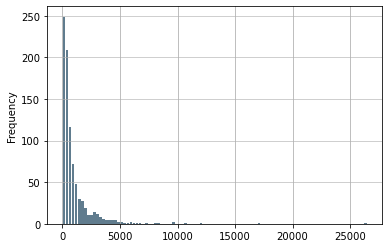

In [37]:
commutes = lo_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [38]:
temp = lo_post[(lo_post['like_count'] <= 1000) & (lo_post['like_count'] > 500)] #讚數大於500 小於1000才取 : 201  篇文章
temp

,new_date,message,jieba_results,like_count
23493,2019-01-02,習近平今天說兩岸「心靈日益契合」，簡直是在睜眼說瞎話，只要軍事恫嚇和外交打壓持續存在，兩岸之間就很難契合，習到今天的談話都還堅持不會放棄武力統一，面對這樣的敵意，兩岸從何去談契合？\r\n\r\n中國政府顯然不了解台灣人民的心，如同蔡英文 Tsai Ing-wen總統所說，民主是台灣人民所珍惜的價值與生活方式，看香港就可以知道所謂「一國兩制」都是謊言。如果中國高層的子女都想當美國人、不想當中國人，那也不用期望台灣人會想當中國人！,習近平 今天 說 兩岸 心靈 日益 契合 簡直 是 在 睜眼說瞎話 只要 軍事 恫嚇 和 外交 打壓 持續 存在 兩岸 之間 就 很 難 契合 習到 今天 的 談話 都 還堅持 不會 放棄 武力 統一 面對 這樣 的 敵意 兩岸 從何 去 談 契合 \r\r中國 政府 顯然 不 了解 台灣 人民 的 心 如同 蔡英文 - 總統 所 說 民主 是 台灣 人民 所 珍惜 的 價值 與 生活 方式 看 香港 就 可以 知道 所謂 一國兩制 都 是 謊言 。 如果 中國 高層 的 子女 都 想 當美 國人 不想 當 中國 人 那 也 不用 期望 台灣 人會 想當 中國 人 ！,699
23504,2019-01-21,在上個月我們召開記者會聲援翁啟惠院長之後，很高興今天檢察官終於決定放棄上訴，翁院長無罪確定！\r\n\r\n希望這樣的發展能讓台灣的生技產業快速回到正軌，也希望翁院長未來能有機會為台灣爭取到第一個本土的諾貝爾獎！,在 上個月 我們 召開 記者 會聲 援翁 啟惠 院長 之 後 很 高興 今天 檢察 官終 於 決定 放棄 上訴 翁 院長 無罪 確定 \r\r希望 這樣 的 發展 能 讓 台灣 的 生技 產業 快速 回到 正軌 也 希望 翁 院長 未來 能 有 機會 為 台灣 爭取 到 第一 個 本土 的 諾貝爾獎 ！,767
23510,2019-01-16,馬英九怎麼好意思提甲等特考？！時任考選部長的王作榮都力主廢除甲等特考，因為他批評甲特是為特權「黑官漂白」。這也是為什麼甲等特考在台灣已成歷史雲煙。\r\n\r\n馬先生，一根指頭指別人時，四根指頭正對著自己！,馬 英九 怎麼 好意思 提 甲等 特考 時任 考選部長 的 王作榮 都 力主 廢除 甲等 特考 因為 他 批 評甲特 是 為 特權 黑官 漂白 。 這也 是 為 什麼 甲等 特考 在 台灣 已成 歷史 雲煙 。 \r\r馬 先生 一根 指頭 指別 人時 四根 指頭 正 對 著 自己 ！,792
23524,2019-02-03,連假返鄉，漫步走到家後方虎頭山的「通霄神社」，那裡有許多小時的回憶，現在環境整理的很幽靜，宛若到日本的感覺。\r\n\r\n#通霄古名呑霄\r\n#虎頭山鳥瞰台灣海峽,連假 返鄉 漫步 走到 家後方虎頭 山 的 通霄 神社 那裡 有 許多小時 的 回憶 現在 環境 整理 的 很 幽靜 宛若 到 日本 的 感覺 。 \r\r# 通霄 古名 呑 霄 \r# 虎頭山 鳥瞰 台灣 海峽,607
23535,2019-02-25,台灣的外交實力，可以強勢到叫馬來西亞的官員跟吉隆坡市長見誰或不見誰？這不是對國際外交的無知，就是故意在幫中國打壓台灣找遮羞布！\r\n\r\n好奇的是，所有的新聞來源都是某家立場鮮明媒體的記者所聽到的「悄悄話」，是真？是假？查証內容？\r\n\r\n更好奇的是，吉隆坡市長跟所謂的馬國官員，真的有答應要出席晚宴嗎？還是如同之前消費名人代言一樣，是根本連招呼都沒打的買空賣空？反正不成局，就喊有人打壓囉！\r\n\r\n#想太多了\r\n#太多想了,台灣 的 外交 實力 可以 強勢 到 叫 馬 來 西亞 的 官員 跟 吉隆坡 市長 見 誰 或 不見 誰 這 不是 對國際 外交 的 無知 就是 故意 在 幫 中國 打壓 台灣 找 遮羞布 \r\r好奇 的 是 所有 的 新聞 來源 都 是 某家 立場 鮮明 媒體 的 記者 所 聽 到 的 悄悄 話 是 真 是 假 查 証 內 容 \r\r更 好奇 的 是 吉隆坡 市長 跟 所謂 的 馬 國官員 真的 有答 應要 出席 晚宴 嗎 還是 如同 之前 消費 名人 代言 一樣 是 根本 連 招呼 都 沒 打 的 買 空賣空 反正 不成 局 就 喊 有人 打壓 囉 \r\r# 想太多 了 \r# 太多想 了,609
...,...,...,...,...
24300,2020-01-10,聲音沙啞地說出我的承諾！\r\n\r\n未來四年，致政仍會選擇加入外交國防委員會，用我的專業，持續推動「國防自主」，與小英總統一起「拚外交、護主權」！\r\n\r\n#我的第一志願在板橋\r\n#我的第一志願在外交國防委員會\r\n#出門投票\r\n#總統3號蔡英文\r\n#立委7號羅致政\r\n#政黨14號請支持民進黨,聲音 沙啞 地 說 出 我 的 承諾 \r\r未來 四年 致政 仍會 選擇 加入 外交 國防 委員 會 用 我 的 專業 持續 推動 國防 自主 與 小英總統 一起 拚 外交 護主權 \r\r# 我 的 第一 志願 在 板橋 \r# 我 的 第一 志願 在 外交 國防 委員 會 \r# 出門 投票 \r# 總統 號 蔡英文 \r# 立委 號羅致政 \r# 政黨 號請 支持 民進黨,979
24303,2020-01-10,選戰倒數最後一天！由 蔡英文 Tsai Ing-wen 總統領軍，陪同致政在板橋車隊大掃街！\r\n請大家加入直播，並且分享給親朋好友，在選戰倒數最後一天，幫我們催票！\r\n\r\n#2020台灣要贏 \r\n#3號英德配\r\n#7號羅致政\r\n#14號民主進步黨,選戰 倒數 最 後 一天 由 蔡英文 - 總統領 軍 陪同 致政 在 板橋 車隊 大掃街 \r請 大家 加入 直播 並且 分享 給親 朋 好友 在 選戰 倒數 最 後 一天 幫 我們 催票 \r\r# 台灣 要贏 \r# 號 英德 配 \r# 號羅致政 \r# 號 民主 進步 黨,828
24311,2020-01-08,#開箱競總\r\n#電話拜票部隊\r\n\r\n各位板橋鄉親，你有接到我們的真人非電腦語音拜票電話了嗎？\r\n\r\n去年10月開始，競總就由志工大哥大姐們組成了「call out電話拜票部隊」，每天從早上9點打到晚上9點，到昨天為止，已經打了上萬通拜票電話了！\r\n\r\n謝謝她們不辭辛勞來為致政催票、拉票、固票，但最重要的，是1月11日，請您記得一定要出門投票！\r\n\r\n最後三天，請各位鄉親好朋友受致政的請託，拿起電話，一天幫忙打10通，三天多拉30票。\r\n\r\n您，也可以是我們的催票部隊！拜託！\r\n\r\n#2020台灣要贏\r\n#3號英德配\r\n#7號羅致政\r\n#14號民主進步黨,# 開箱 競 總 \r# 電話 拜票 部隊 \r\r各位 板橋 鄉親 你 有 接到 我們 的 真人 非電腦 語音 拜票 電話 了 嗎 \r\r去年 月 開始 競總 就 由志工 大哥 大姐 們 組成 了 電話 拜票 部隊 每天 從 早上 點打 到 晚上 點 到 昨天 為止 已經 打 了 上 萬通 拜票 電話 了 \r\r謝謝 她 們 不辭 辛勞來 為 致政 催票 拉票 固票 但 最 重要 的 是 月 日 請 您 記得 一定 要 出門 投票 \r\r最 後 三天 請 各位 鄉親 好 朋友 受 致政 的 請 託 拿起 電話 一天 幫忙 打 通 三天 多拉 票 。 \r\r您 也 可以 是 我們 的 催票 部隊 拜 託 \r\r# 台灣 要贏 \r# 號 英德 配 \r# 號羅致政 \r# 號 民主 進步 黨,654
24319,2020-01-06,【直播預告】王定宇來板橋助陣！\r\n\r\n王定宇委員不僅是全國第一高票當選的好立委，也是致政在外交與國防委員會的好戰友。這次他專程從台南北上，真的是情義相挺！\r\n\r\n明天（1/7）上午10點，我們作伙在板橋國泰市場，和大家道早安，也會在臉書直播。距離投票日還有五天，我們一起加油！\r\n\r\n#旗開得勝7號羅致政\r\n#台南第六選區投4號王定宇,直播 預告 王定 宇來 板橋 助陣 \r\r王定宇 委員 不僅 是 全國 第一 高票 當選 的 好 立委 也 是 致政 在 外交 與 國防 委員 會 的 好 戰友 。 這次 他 專程 從 台 南北 上 真的 是 情義 相挺 \r\r明天 / 上午 點 我們 作伙 在 板橋 國泰 市場 和 大家 道 早安 也 會 在 臉書 直播 。 距離 投票 日 還有 五天 我們 一起 加油 \r\r# 旗開 得勝 號羅致政 \r# 台南 第六 選區 投 號王 定宇,893


In [39]:
corpus = temp['jieba_results'].values.tolist() #如果不做這個、結果會不同 太generall

In [41]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  # 計算單字出現在文件中的次數
X = vectorizer.fit_transform(corpus) #  input must be a list, return a matrix (#of corpus) x (# of word) # 201 x 4835
word = vectorizer.get_feature_names() # column name which is the word
message_column = word

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  # 計算tfidf
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X) # X : corpus x word matrix, output:201 x 4835

In [42]:
tfidf_view = pd.DataFrame(tfidf.toarray(), columns = vectorizer.get_feature_names())
tfidf_view

,___,_____,一下,一些,一代,一件,一份,一位,一個,一公,...,點滴,點賣,點這裡,點頭,黨團,黨未,黨部,鼓勵,鼓掌,齊喊
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# #使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=8, random_state=None)
LDA.fit(X) # 用countrvectorizer() result 去fit 

topic_message = list()
#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    mes_topic = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(mes_topic)
    for i in mes_topic:
        topic_message.append(i)

TOP 10 WORDS PER TOPIC #0
['今天', '致政', '人民', '民進黨', '蔡英文', '條例', '香港', '我們', '中國', '台灣']
TOP 10 WORDS PER TOPIC #1
['可以', '小英', '一起', '實現', '活動', '致政', '我們', '大家', '台灣', '板橋']
TOP 10 WORDS PER TOPIC #2
['負擔', '政府', '大家', '要贏', '民主', '中國', '板橋', '補助', '我們', '台灣']
TOP 10 WORDS PER TOPIC #3
['大家', '孩子', '蔡英文', '外交', '客家', '總統', '致政', '台灣', '板橋', '我們']
TOP 10 WORDS PER TOPIC #4
['立委', '直播', '一起', '蔡英文', '總統', '大家', '致政', '台灣', '我們', '板橋']
TOP 10 WORDS PER TOPIC #5
['一起', '鄉親', '支持', '蔡英文', '大家', '總統', '韓國瑜', '板橋', '我們', '台灣']
TOP 10 WORDS PER TOPIC #6
['美國', '通過', '國防', '委員', '這是', '板橋', '戰機', '我們', '台灣', '法官']
TOP 10 WORDS PER TOPIC #7
['致政', '感謝', '美國', '板橋', '總統', '我們', '大家', '國家', '蔡英文', '台灣']


In [44]:
LDA.fit(tfidf) # 用tfidf result 去fit 

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['一個', '關心', '外患罪', '外交', '蔡英文', '總統', '大家', '長照', '美國', '台灣']
TOP 10 WORDS PER TOPIC #1
['國家', '美國', '一起', '總統', '蔡英文', '大家', '我們', '直播', '板橋', '台灣']
TOP 10 WORDS PER TOPIC #2
['加油', '捐款', '政治', '致政', '立委', '國防', '電話', '台灣', '我們', '板橋']
TOP 10 WORDS PER TOPIC #3
['蔡英文', '一起', '感謝', '總統', '大家', '掃街', '致政', '我們', '板橋', '台灣']
TOP 10 WORDS PER TOPIC #4
['調查', '參香', '我們', '獨家', '戰機', '政府', '牛肉', '余天', '板橋', '台灣']
TOP 10 WORDS PER TOPIC #5
['個展', '思源', '飲水', '憶枋橋', '餛飩', '台灣', '我們', '直播', '香港', '板橋']
TOP 10 WORDS PER TOPIC #6
['民主', '補助', '蔡英文', '機車', '總統', '法官', '國家', '板橋', '大家', '台灣']
TOP 10 WORDS PER TOPIC #7
['今晚', '大家', '教育部', '板橋', '客家', '民進黨', '台灣', '課綱', '我們', '外交']


In [53]:
#政見做斷詞
politics_lo = politics[politics.姓名 == "羅 致 政"].政見.to_string()
politics_lo = re.sub(re_punctuation, "", politics_lo)
politics_lo = re.sub(r'[0-9]','',politics_lo)
politics_lo = re.sub(r'[a-zA-Z]','',politics_lo)
politics_lo = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',politics_lo)  # 注意裡面不能有空白！
jieba.load_userdict("dict.txt")
words = jieba.lcut(politics_lo, cut_all = False)
print(words)

[' ', ' ', ' ', ' ', '「', '改變', '」', '是', '這些', '年', '最響', '亮', '的', '政治', '廣告', '口號', '，', '但要', '改變', '什麼', '呢', '？', '四年', '前當', '我決', ' ', '定', '繼續', '在', '板橋', '基層', '深耕', '後', '，', '就', '深刻', '體認', '：', '我', '不再', '是', '一個', '可以', '隱遁', '在', '寧靜校', '園裡', '的', ' ', '大學', '老師', '，', '我', '必須', '和', '大家', '一起', '呼吸', '，', '勇敢', '面對', '人世', '間', '的', '不義和苦', '難', '這些', '年', '來', '我', '選擇', '以無給', '職', '的', '新北市', '黨部', '主委', '做', '為', '舞台', '，', '全力', '為民眾', '和', '公職', '人員', '搭', '好', '溝通', '的', ' ', '橋', '樑', '我', '深切', '體認', '，', '大家', '想', '改變', '的', '不是', '只換個', '政黨', '執政', '而已', '，', '而是', '有', '權力', '的', '人', '可', ' ', '以', '用心', '讓', '小市民', '生活', '過得', '更好', ' ', '這是', '我', '的', '從政', '初衷', '沒有', '派系', '，', '也', '不是', '政治', '世家', '，', '選擇', '從', '校園', '踏進', '政治', '圈', '答案', '始終', '只有', '一個', '，', '就是', '為', '了', '實踐', '理想', '羅致政', '承諾將', '以', '「', '正直', '理性', '問政', '、', '人民', ' ', '福祉', '優先', '」', '的', '理念', '，', '來', '落實', '國會', '改革', '與', '為民', '服務', '的', '目標', '一', '、', '國會

In [55]:
#觀察政見的斷詞結果
inspect_words = jieba.cut(politics_liu, cut_all = False)
text = ''
for word in inspect_words:
    text = text + ' ' + str(word) 
text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',text)
text = re.sub(re_punctuation, "", text)

In [52]:
# 政見做tfidf
p_vectorizer = CountVectorizer()  
p_X = p_vectorizer.fit_transform(words)  
word = p_vectorizer.get_feature_names() 
p_transformer = TfidfTransformer()  
p_tfidf = p_transformer.fit_transform(p_X) #143 word in 

p_LDA = LatentDirichletAllocation(n_components=8, random_state=None)

#政見做LDA
p_LDA.fit(p_tfidf)
topic_politics = list()
#觀看結果
for i,topic in enumerate(p_LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    topic_p = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(topic_p)
    for i in topic_p:
        topic_politics.append(i)

TOP 10 WORDS PER TOPIC #0
['上周', '上路', '上辦', '一次', '一筆', '一時', '上禮', '七點', '不止', '一座']
TOP 10 WORDS PER TOPIC #1
['一開口', '上門', '下去', '下午', '一支', '不久前', '上台', '不已', '三國', '一直']
TOP 10 WORDS PER TOPIC #2
['_____', '一張', '上車', '不分區', '一定', '一根', '不定', '上線', '不成', '三天']
TOP 10 WORDS PER TOPIC #3
['不為', '三立新聞', '不幸', '一市場', '不懼', '一塊', '一件', '三年有成', '一步', '三讀']
TOP 10 WORDS PER TOPIC #4
['不易', '一號', '上節', '不團結', '一貫', '一條', '不僅', '一生', '一群', '___']
TOP 10 WORDS PER TOPIC #5
['一份', '上個月', '一肩', '一下', '下台', '一站', '不會鎖', '三個', '一劃', '不堪']
TOP 10 WORDS PER TOPIC #6
['下方', '三軍統帥', '不如', '上課', '不再', '一位', '一萬步', '不卑不亢', '三星', '三千多']
TOP 10 WORDS PER TOPIC #7
['不安', '下午茶', '不是', '三重', '三棟', '一出', '不得', '一些', '不想', '一結束']
